# Rate-based Plasticity Rules

## Hebbian Plasticity

**Goals**
+ abc


### Initialization

In [9]:
!pip install numpy scipy matplotlib scikit-learn;
!pip install ipywidgets;
import numpy as np
import scipy.linalg as lin
from numpy.random import default_rng
rng = default_rng()
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plt.style.use("./plots_style.txt")

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### Utility Functions

In [16]:
def ornstein_uhlenbeck(mean,cov,dt,Ttot,dts=1E-2):
  """
  Generates a multi-dimensional Ornstein-Uhlenbeck process.

  Parameters :
  mean (numpy vector) : desired mean
  cov  (matrix)   : covariance matrix (symmetric, positive definite)
  dt   (real)     : timestep output
  Tot  (real)     : total time
  dts = 1E-3 (real) : simulation timestep

  Returns :
  times (numpy vector)
  rates (numpy matrix)  :  rates[i,j] is the rate of unit i at time times[j]
  """
  times = np.linspace(0.0,Ttot-dt,num=int(Ttot/dt))
  n = len(mean)
  nTs = int(Ttot/dts)
  rates_all = np.empty((n,nTs))
  rates_all[:,0] = 0
  L = lin.cholesky(cov)
  nskip = int(dt/dts)
  assert round(dts*nskip,5) == dt , "dt must be multiple of  " + str(dts)
  for t in range(1,nTs):
    dr = dts*(mean-rates_all[:,t-1])
    dpsi = np.sqrt(2*dts)*(L.T @ rng.standard_normal(n))
    rates_all[:,t] = rates_all[:,t-1] + dr + dpsi
  # subsample 
  rates = rates_all[:,::nskip]
  return times,rates
  
def twodimensional_UL(mean1,var1,mean2,var2,corr,dt,Ttot,dts=1E-2):
  """
  Generates samples from a 2D Ornstein-Uhlenbeck process.

  Parameters :
  mean1 (real) : mean on first dimension
  var1  (real) : variance on first dimension (at dt=1. intervals)
  mean2 (real) : - 
  var2  (real) : - 
  corr  (real) : correlation coefficient 
  dt   (real)     : timestep output
  Tot  (real)     : total time
  dts = 1E-3 (real) : simulation timestep

  Returns :
  times  (numpy vector)
  rates1 (numpy vector)
  rates2 (numpy vector)
  """
  assert -1<=corr<=1, "correlation must be in (-1,1) interval"
  var12 = corr*var1*var2
  (times, rates) = ornstein_uhlenbeck(
      np.array([mean1,mean2]),
      np.array([[var1,var12],[var12,var2]]),
      dt,Ttot,dts)
  return times, rates[0,:],rates[1,:]


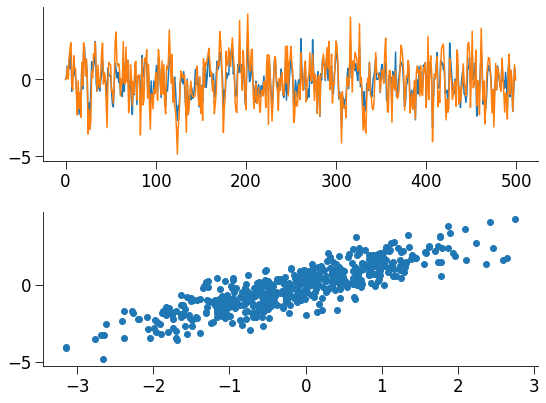

In [20]:
times,rates1,rates2 = twodimensional_UL(0.,1.,0.,2.,0.6,1.0,500.0)
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(times,rates1)
ax1.plot(times,rates2)
ax2.scatter(rates1,rates2)

In [21]:
@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

def f(x):
    return x
interact(f,x=10)

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.f(x)>

In [ ]:
def mySTDP_plot(A_plus, A_minus, tau_plus, tau_minus, Delta_t, dW):
  '''
  A_plus : maximum amount of potentiation (LTP)
  A_minus: maximum amount of depression (LTD)
  tau_plus: LTP time constant
  tau_minus: LTD time constant 
  Delta_t : array with the time differences between post- and pre-synaptic spikes
  dW : synaptic change 
  '''
  plt.figure()
  plt.plot([-5 * tau_minus, 5 * tau_plus], [0, 0], 'k', linestyle=':')
  plt.plot([0, 0], [-A_minus, A_plus], 'k', linestyle=':')

  plt.plot(Delta_t[Delta_t <= 0], dW[Delta_t <= 0], 'r')
  plt.plot(Delta_t[Delta_t > 0], dW[Delta_t > 0], 'b')

  plt.xlabel(r'$\Delta t=$ t$_{\mathrm{post}}$ - t$_{\mathrm{pre}}$ (ms)')
  plt.ylabel(r'$\Delta $W', fontsize=14)
  plt.title('Pairwise STDP rule', fontsize=12, fontweight='bold')
  plt.show()

In [ ]:
cov_mat = np.array([[ 1.0 , 0.5],[0.5,1.0]])
mean = np.array([2.,2.0])
times,rates = ornstein_uhlenbeck(mean,cov_mat,1.0,50.0)



AssertionError: dt must be multiple of  0.01

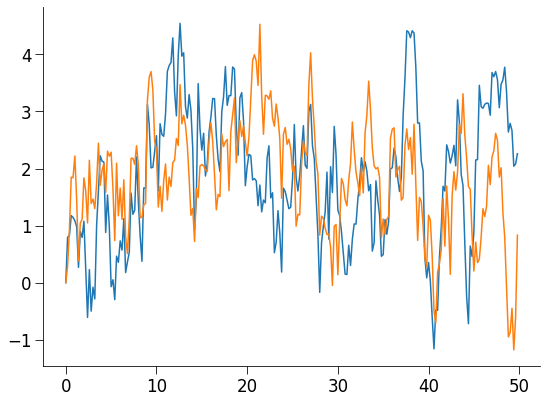

In [ ]:
plt.plot(times,rates[0,:],times,rates[1,:]);

In [ ]:
np.var(rates[1,:])

6.245847614482875

In [ ]:
times[-1]

800.0

In [ ]:
print(np.mean(rates[0,:]), np.var(rates[0,:]))

2.1045596508933997 0.9794121356814446


In [ ]:
def Delta_W(A_plus, A_minus, tau_plus, tau_minus, Delta_t):
  """
  Calculates the instantaneous change in weights dW due to the STDP pairwise rule

  A_plus : maximum amount of potentiation (LTP)
  A_minus: maximum amount of depression (LTD)
  tau_plus: LTP time constant
  tau_minus: LTD time constant 
  Delta_t : array with the time differences between post- and pre-synaptic spikes
  """

  # Initialize the STDP change
  dW = np.zeros(len(Delta_t))
  # Calculate dW for LTP
  dW[Delta_t > 0] = A_plus * np.exp(-Delta_t[Delta_t > 0] / tau_plus)
  # Calculate dW for LTD
  dW[Delta_t <= 0] = -A_minus * np.exp(delta_t[Delta_t <= 0] / tau_minus)

  return dW

In [ ]:
rates

array([[ 0.        ,  0.26638768,  0.55686151, ...,  1.62081254,
         1.65570327,  1.5927861 ],
       [ 0.        , -0.14938077,  0.09333185, ...,  0.99675093,
         1.31832809,  1.46415068]])

In [ ]:
rates

array([[ 0.        ,  0.26638768,  0.55686151, ...,  1.62081254,
         1.65570327,  1.5927861 ],
       [ 0.        , -0.14938077,  0.09333185, ...,  0.99675093,
         1.31832809,  1.46415068]])

In [ ]:
vals = rng.standard_normal(10)
vals

array([-0.56280607, -0.67602658,  1.03226243, -0.25682532, -0.27960236,
        0.53605969, -3.61105565,  1.51060466,  1.24320496, -0.64786565])

In [ ]:
# define the STDP rule parameters
A_plus = 1
A_minus = 1
tau_plus = 20  #[ms]
tau_minus = 10 #[ms]

delta_t = np.linspace(-5 * tau_minus, 5 * tau_plus, 50)

dW = Delta_W(A_plus, A_minus, tau_plus, tau_minus, Delta_t)

mySTDP_plot(A_plus, A_minus, tau_plus, tau_minus, Delta_t, dW)

NameError: name 'Delta_t' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=074c8271-80e9-4d9f-94a8-13db082db696' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>